# Семинар_4

## 1 задача

1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('laptops_10.csv', sep = ',')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с  помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

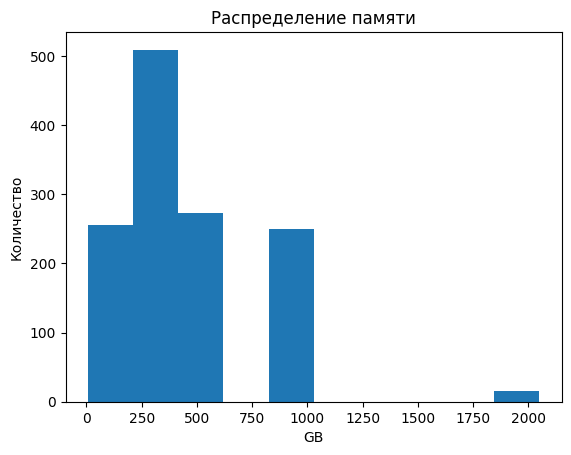

In [48]:
plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

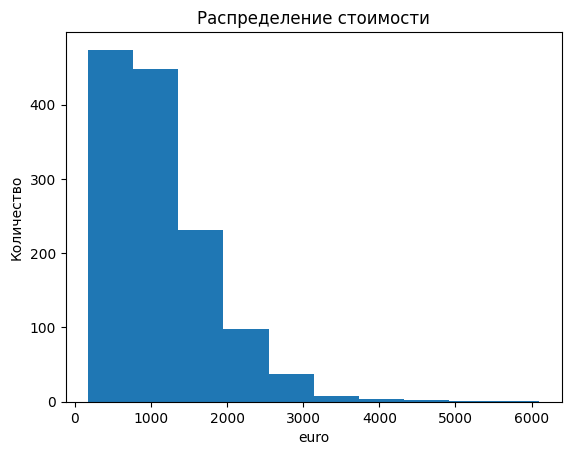

In [49]:
plt.hist(df['Price_euros'])
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');

### 1.3 Изучите вес ноутбуков с помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

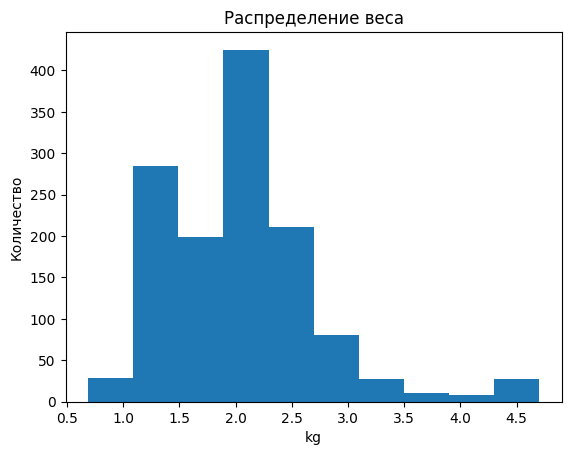

In [50]:
plt.hist(df['Weight'])
plt.title('Распределение веса')
plt.xlabel('kg')
plt.ylabel('Количество');

## 2 Задача
### 2.1 Изучите распределение типов носителя

- Постройте график
- Сделайте выводы

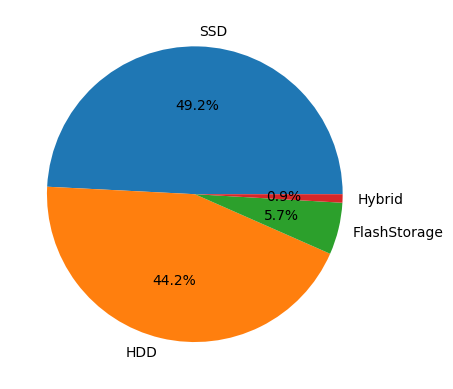

In [51]:
plt.pie(df['Memory_Type'].value_counts().values, autopct = '%1.1f%%', labels = df['Memory_Type'].value_counts().index);

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64


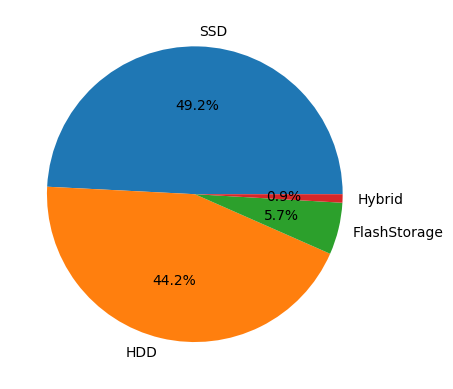

In [52]:
data = df['Memory_Type'].value_counts()
print (data)
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names);

### 2.2 Изучите распределение компаний производителей

- Постройте график
- Сделайте выводы

In [53]:
data = df['Company'].value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

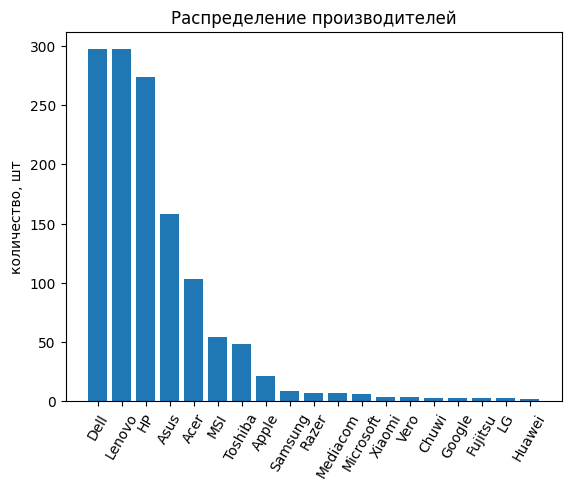

In [54]:
names = data.index
values = data.values

plt.bar(names, values)
plt.title('Распределение производителей')
plt.ylabel('количество, шт')
plt.xticks(rotation = 60);

### 2.3 Изучите распределение операционной системы

- Постройте график
- Сделайте выводы

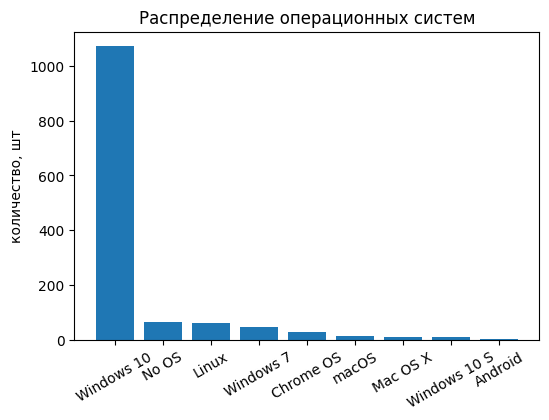

In [55]:
data = df['OpSys'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(6, 4))
plt.bar(names, values)
plt.title('Распределение операционных систем')
plt.ylabel('количество, шт')
plt.xticks(rotation = 30);

### 2.4 Изучите распределение компаний производителей CPU

- Постройте график
- Сделайте выводы

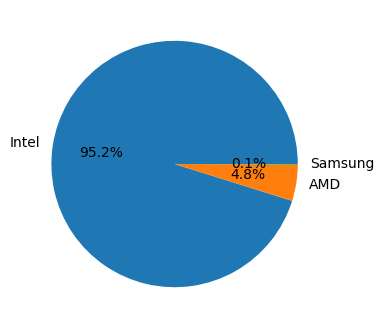

In [56]:
data = df['Cpu_Company'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(6, 4))
# plt.bar(names, values)
# plt.title('Распределение производителей CPU')
# plt.ylabel('количество, шт')
# plt.xticks(rotation = 30);

plt.pie(values, autopct='%.1f%%', labels=names);

## 3 задача
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму


Процессоры от Samsung не изучайте

### 3.1 Постройте график в абсолютных величинах

In [64]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


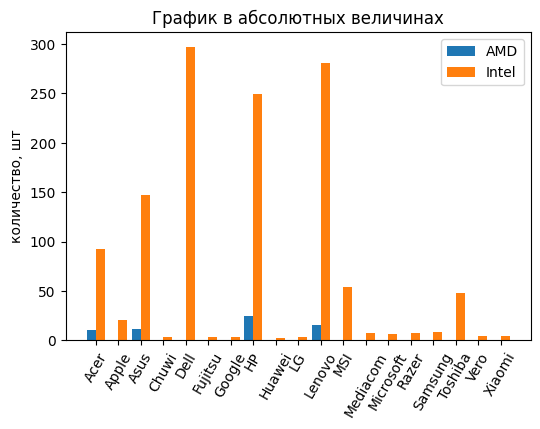

In [70]:
plt.figure(figsize=(6, 4))
end_ticks = np.arange(len(data['AMD']))
w = 0.4
offset = 0.2


plt.bar(end_ticks - offset, data['AMD'], width= w)
plt.bar(end_ticks + offset, data['Intel'], width= w)
plt.title('График в абсолютных величинах')
plt.ylabel('количество, шт')
plt.xticks(end_ticks, data['Company'], rotation = 60)
plt.legend(['AMD', 'Intel']);

### 3.2 Постройте график в относительных величинах

In [71]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


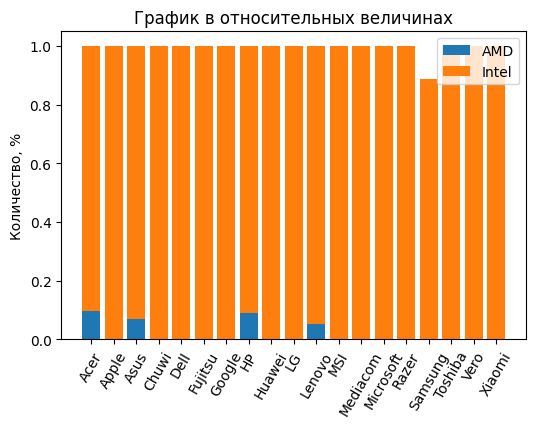

In [74]:
plt.figure(figsize=(6, 4))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])
plt.title('График в относительных величинах')
plt.ylabel('Количество, %')
plt.xticks(rotation = 60);
plt.legend(['AMD', 'Intel']);

## 4 задача
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

Text(0.5, 1.0, 'Взаимосвязь стоимости и производителя процессора')

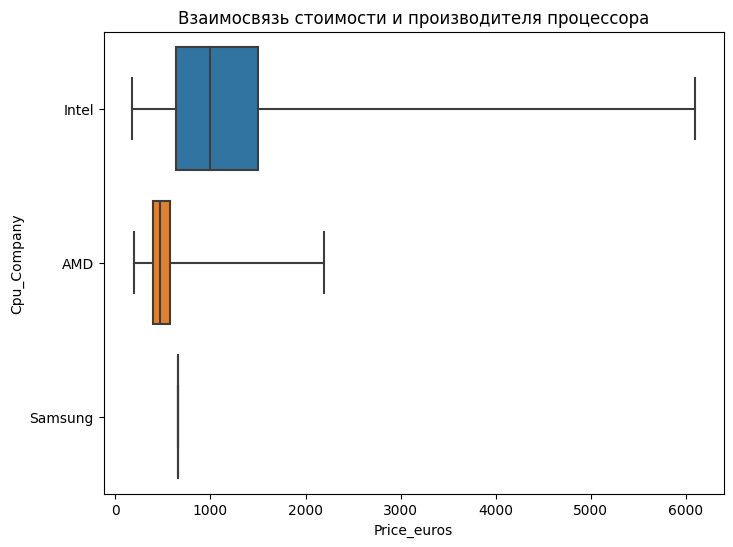

In [80]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price_euros'], y = df['Cpu_Company'], whis=10)
plt.title('Взаимосвязь стоимости и производителя процессора')

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

Text(0.5, 1.0, 'Взаимосвязь стоимости и типа носителя памяти')

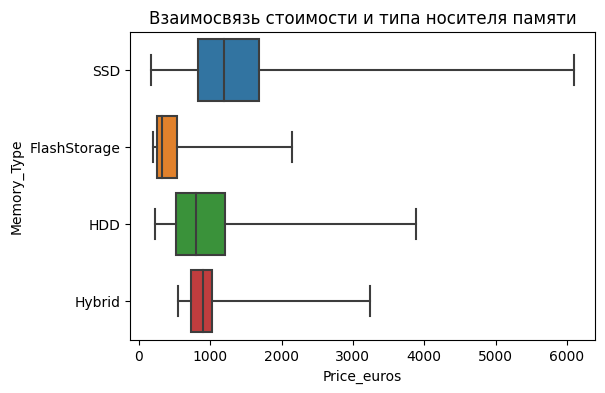

In [83]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price_euros'], y = df['Memory_Type'], whis=10)
plt.title('Взаимосвязь стоимости и типа носителя памяти')

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

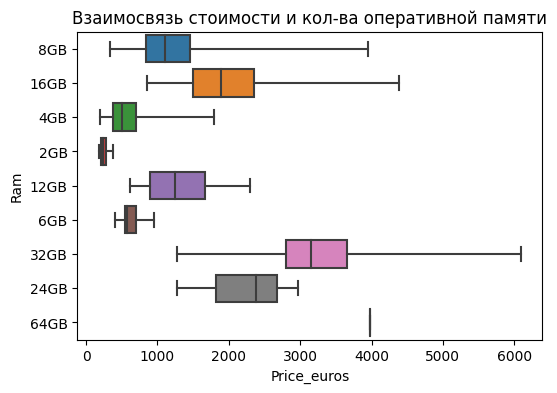

In [85]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price_euros'], y = df['Ram'], whis=10)
plt.title('Взаимосвязь стоимости и кол-ва оперативной памяти');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

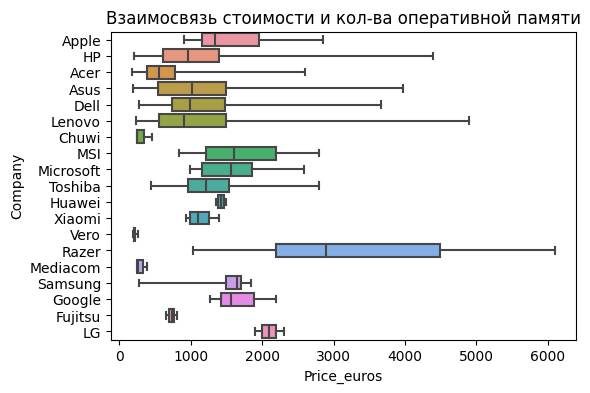

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price_euros'], y = df['Company'], whis=10)
plt.title('Взаимосвязь стоимости и кол-ва оперативной памяти');

## 5 задача*

Постройте матрицу корреляций для таблицы

In [88]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\parkl\AppData\Local\Temp\ipykernel_9928\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


<AxesSubplot:>

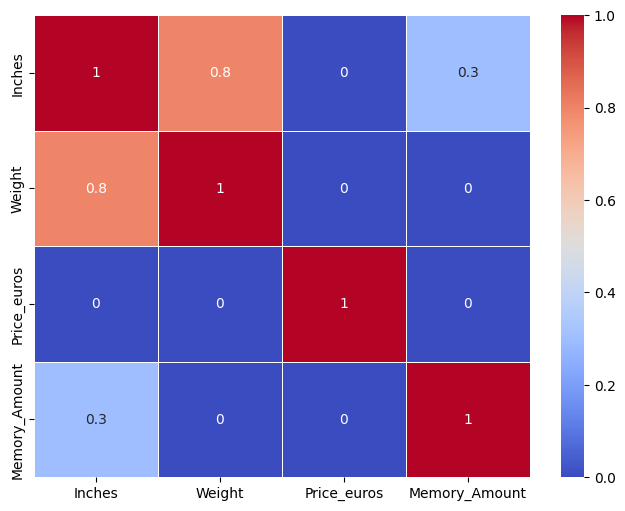

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')